In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


In [8]:
# Select only the numeric columns for correlation matrix
numeric_columns = [
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'
]



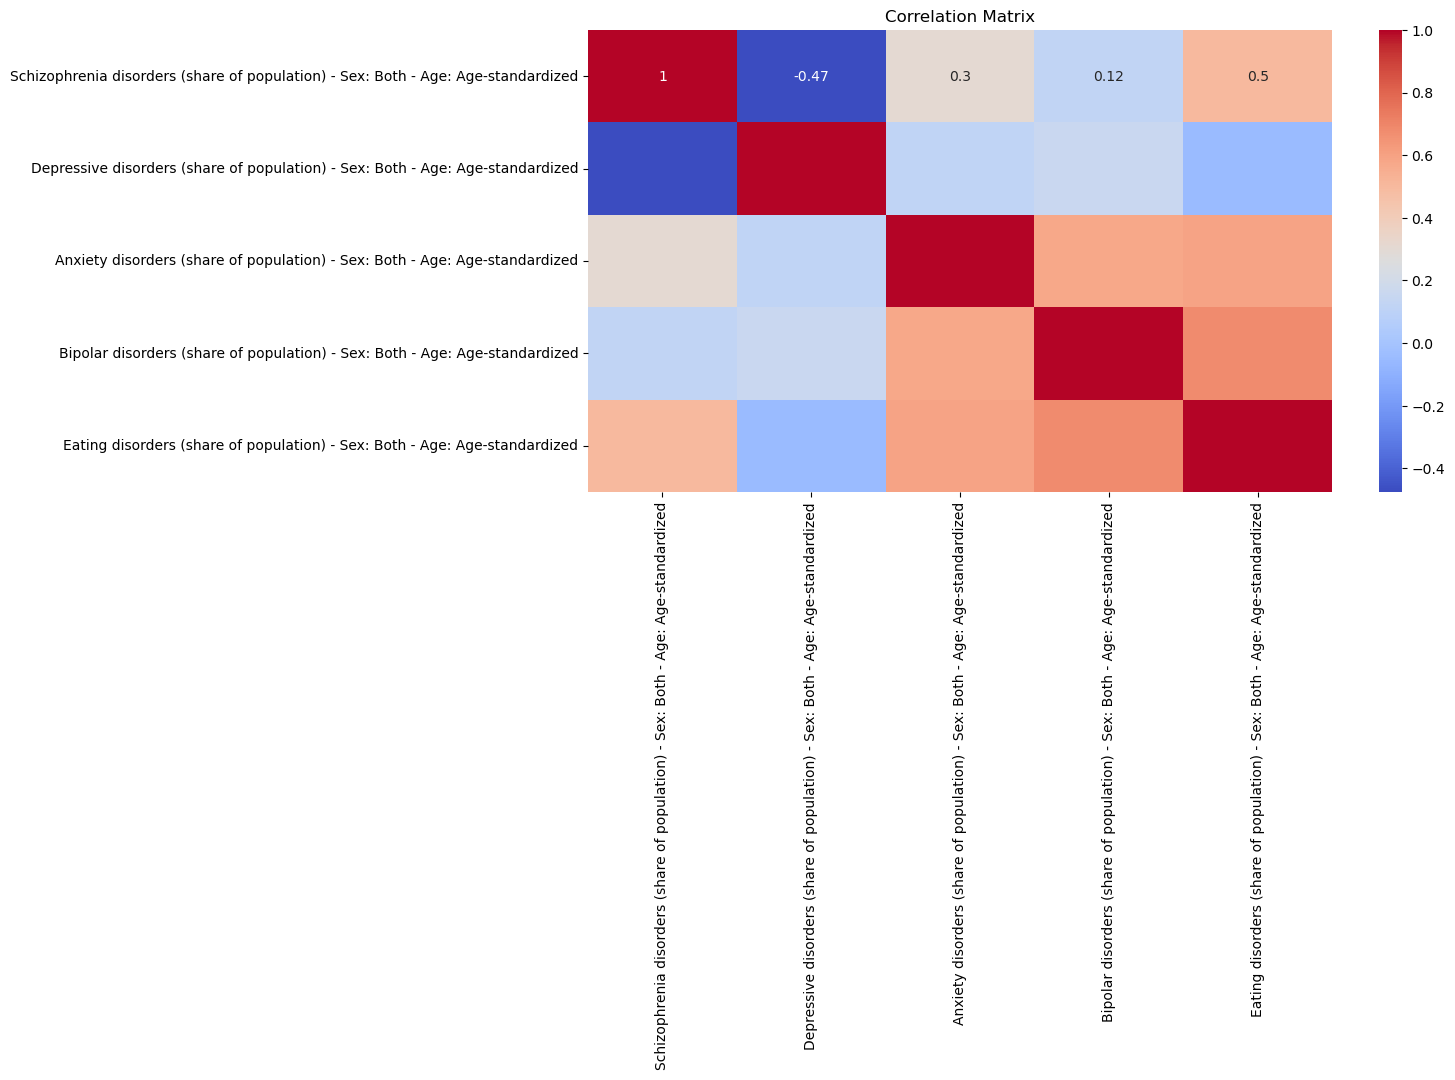

In [9]:
# Exploratory Data Visualization (EDV) - Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



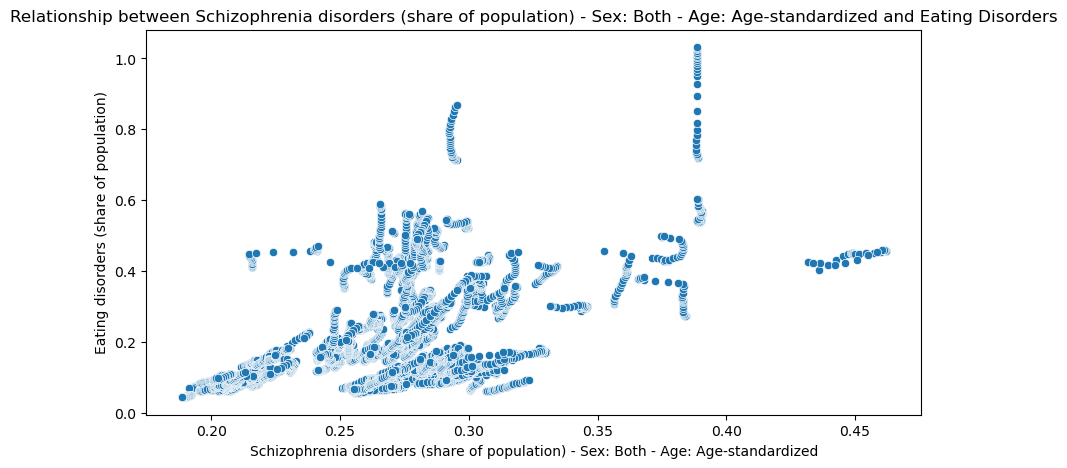

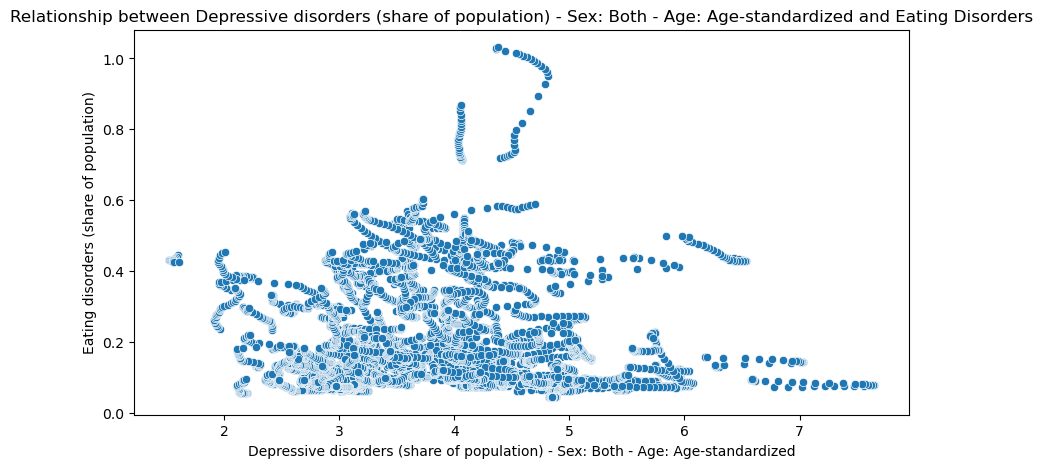

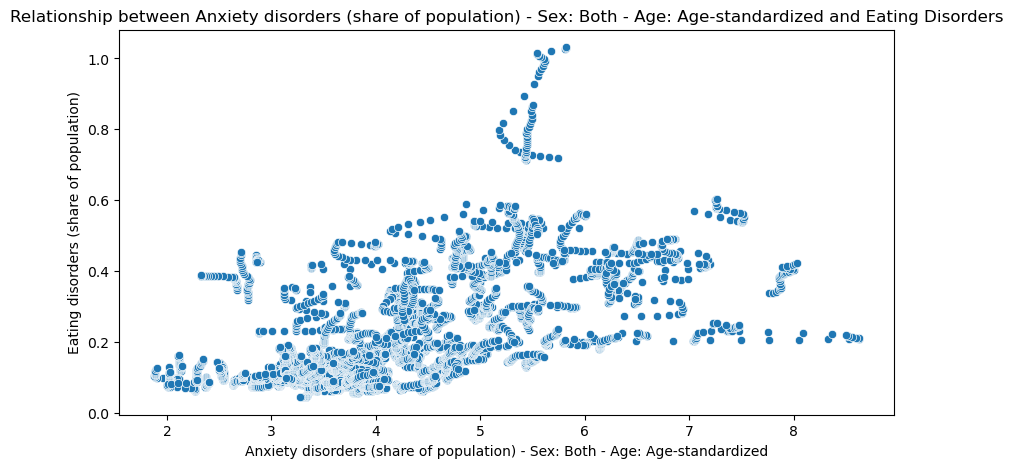

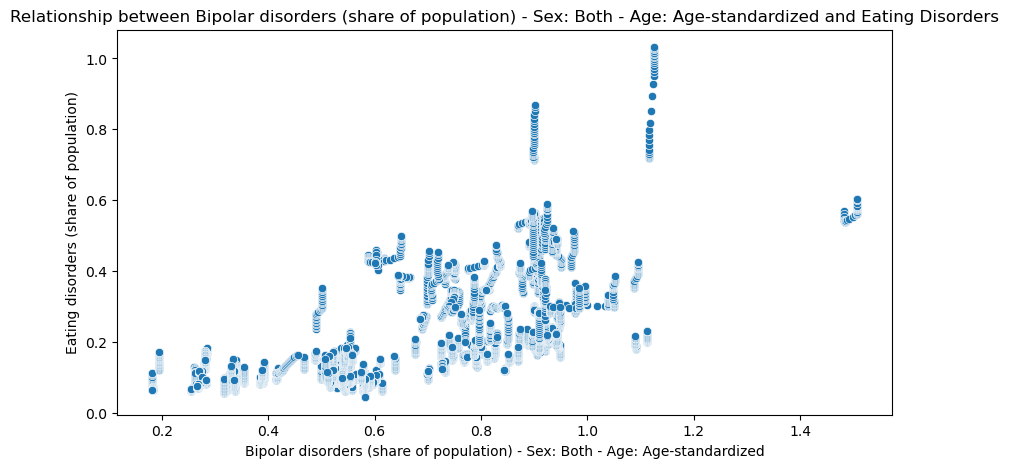

In [11]:
# Visualize the relationships between features and target variable
features = [
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'
]

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[feature], y=data['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'])
    plt.title(f'Relationship between {feature} and Eating Disorders')
    plt.xlabel(feature)
    plt.ylabel('Eating disorders (share of population)')
    plt.show()



In [12]:
# Handle missing values if any
data = data.dropna()



In [13]:
# Select features and target variable
X = data[features]
y = data['Eating disorders (share of population) - Sex: Both - Age: Age-standardized']



In [14]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [35]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)






LogisticRegression()

In [38]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print('Logistic Regression Accuracy:', log_reg_accuracy)

Logistic Regression Accuracy: 0.9845528455284552


In [21]:
# Initialize and train Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)



RandomForestClassifier()

In [22]:
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', rf_accuracy)


Random Forest Accuracy: 0.9975609756097561


In [23]:
# Initialize and train K-Nearest Neighbors model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)





KNeighborsClassifier()

In [24]:
y_pred_knn = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print('K-Nearest Neighbors Accuracy:', knn_accuracy)

K-Nearest Neighbors Accuracy: 0.9967479674796748


In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [46]:
# Initialize and train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lr, y_train_lr)
y_pred_lin_reg = lin_reg.predict(X_test_lr)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test_lr, y_pred_lin_reg))
lin_reg_r2 = r2_score(y_test_lr, y_pred_lin_reg)
print('Linear Regression Root Mean Squared Error:', lin_reg_rmse)
print('Linear Regression R2 Score:', lin_reg_r2)

Linear Regression Root Mean Squared Error: 0.08376055837255639
Linear Regression R2 Score: 0.6622367888660141


In [42]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)


GaussianNB()

In [43]:
y_pred_gnb = gnb.predict(X_test_scaled)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Gaussian Naive Bayes Accuracy: {acc_gnb:.2f}')

Gaussian Naive Bayes Accuracy: 0.96


In [31]:
sgd = SGDClassifier()
sgd.fit(X_train_scaled, y_train)

SGDClassifier()

In [45]:
y_pred_sgd = sgd.predict(X_test_scaled)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
print(f'SGD Classifier Accuracy: {acc_sgd:.2f}')

SGD Classifier Accuracy: 0.98


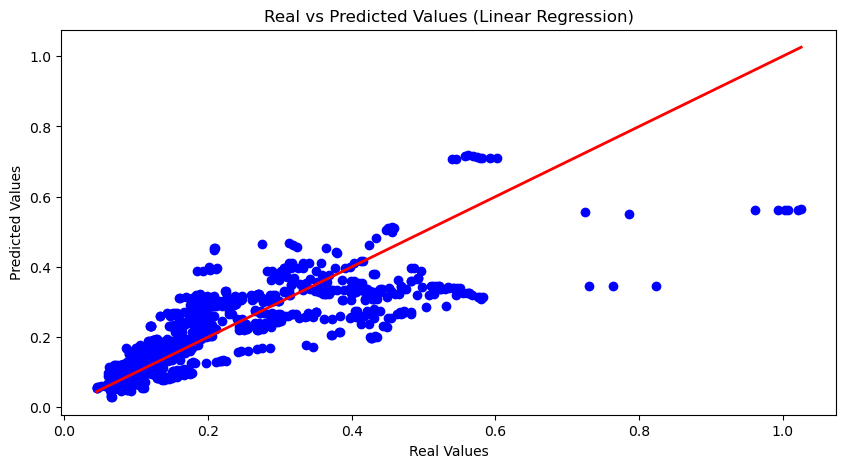

In [17]:
# Visualize Predictions for Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test_lr, y_pred_lin_reg, color='blue')
plt.plot([min(y_test_lr), max(y_test_lr)], [min(y_test_lr), max(y_test_lr)], color='red', linewidth=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values (Linear Regression)')
plt.show()